In [182]:
import pandas as pd
import os
import numpy as np
import re

from sklearn.ensemble import RandomForestClassifier

    #畫圖
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

    #分資料
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
    #看準確度
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

    # import warnings filter
from warnings import simplefilter
    # ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

#from matplotlib.colors import ListedColormap
print("Setup Complete")

Setup Complete


In [183]:
#read data
path =".\project.csv"
data = pd.read_csv(path)
data.head()

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,HBP,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,Year,CY
0,Roy Halladay\hallaro01,33,PHI,NL,21,10,0.677,2.44,33,33,...,6,167,3.01,1.041,8.3,0.9,1.1,7.9,2010,0
1,Felix Hernandez\hernafe02,24,SEA,AL,13,12,0.520,2.27,34,34,...,8,174,3.04,1.057,7.0,0.6,2.5,8.4,2010,1
2,CC Sabathia*\sabatc.01,29,NYY,AL,21,7,0.750,3.18,34,34,...,7,136,3.54,1.191,7.9,0.8,2.8,7.5,2010,1
3,Chris Carpenter\carpech01,35,STL,NL,16,9,0.640,3.22,35,35,...,13,120,3.69,1.179,8.2,0.8,2.4,6.9,2010,0
4,Dan Haren\harenda01,29,TOT,MLB,12,12,0.500,3.91,35,35,...,5,106,3.71,1.272,9.4,1.2,2.1,8.3,2010,0


In [184]:
drop_l = data[(data.Lg=='MLB')].index.tolist()
print(drop_l)

[4, 28, 36, 39, 159, 179, 236, 254, 275, 300, 317, 319, 323, 334, 341, 353, 423, 447, 465, 491, 507, 515, 524, 546, 551, 570, 579, 613, 615, 656, 668, 741, 765, 785, 794, 795, 813, 862, 865, 869, 894, 907, 928, 983, 986, 1040, 1083, 1086, 1098, 1106, 1138, 1172, 1191]


In [185]:
#MLB clearance
data_cleaned = data.drop(index=drop_l)

In [186]:
#encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le = data_cleaned
data_le['Lg'] = labelencoder.fit_transform(data_le['Lg'])

In [187]:
#建立X,y並分好train,test data
drop_column = ['Name','Tm','W','L','CY']
X = data_le.drop(drop_column, axis= 1)
y = data_le.CY

In [203]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X, y, test_size= 0.2, random_state = 1)

In [204]:
from sklearn.neighbors import KNeighborsClassifier
knn0 = KNeighborsClassifier()
knn0.fit(train_X1,train_y1)
pred_y0 = knn0.predict(test_X1)
acc0= accuracy_score(test_y1, pred_y0)
print(acc0)

0.9695652173913043


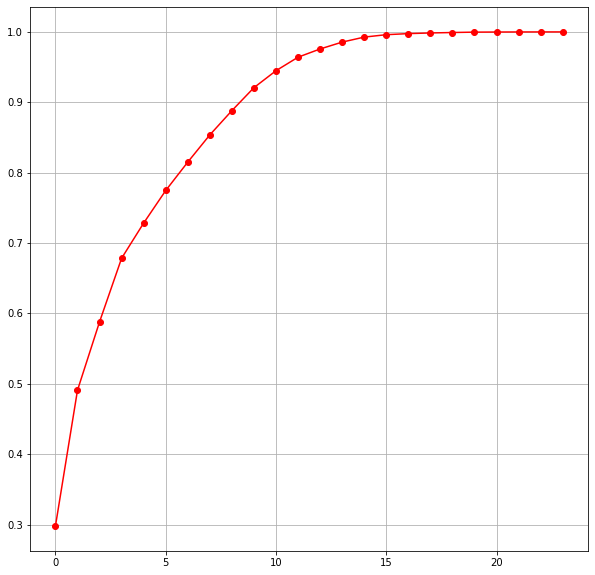

In [205]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_sc)
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [208]:
pca_new = PCA(n_components=9)
X_pca=(pca_new.fit_transform(X_sc))

In [211]:
train_X, test_X, train_y, test_y = train_test_split(X_sc, y, test_size= 0.2, random_state = 42)

In [212]:
#只PCA 不調參數model
knn1 = KNeighborsClassifier()
knn1.fit(train_X,train_y)
pred_y = knn1.predict(test_X)
acc1 = accuracy_score(test_y, pred_y)
print(acc1)

0.9739130434782609


Text(0, 0.5, 'Error Rate')

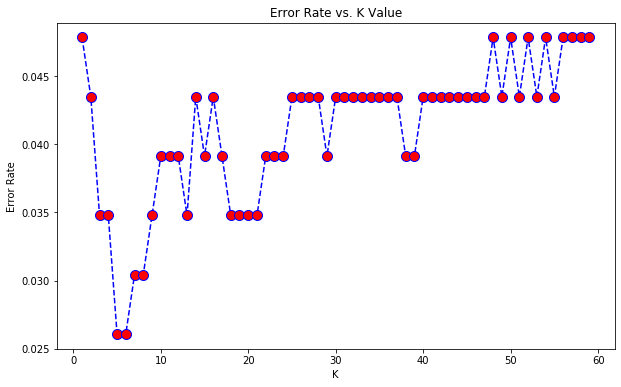

In [213]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_y)
    pred_i = knn.predict(test_X)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [220]:
#對 max_depth search
p1= {'weights':['uniform','distance'],'algorithm':['ball_tree','kd_tree','brute']}
rfc_g1= GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=5),
                     param_grid =p1,
                     scoring='accuracy',
                     cv=5).fit(train_X,train_y)

#pd.DataFrame(rfc_g1.cv_results_).sort_values('rank_test_score')
print(rfc_g1.best_params_)
print('grid search best score :',rfc_g1.best_score_)
pd.DataFrame(rfc_g1.cv_results_).sort_values('rank_test_score')

{'algorithm': 'ball_tree', 'weights': 'uniform'}
grid search best score : 0.9564445236398192


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002193,3.963239e-04,0.010373,0.000801,ball_tree,uniform,"{'algorithm': 'ball_tree', 'weights': 'uniform'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1
1,0.001995,4.862804e-07,0.004787,0.000399,ball_tree,distance,"{'algorithm': 'ball_tree', 'weights': 'distance'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1
2,0.003180,3.758908e-04,0.010478,0.000446,kd_tree,uniform,"{'algorithm': 'kd_tree', 'weights': 'uniform'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1
3,0.003002,1.682566e-05,0.006016,0.000085,kd_tree,distance,"{'algorithm': 'kd_tree', 'weights': 'distance'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1
4,0.000798,3.991144e-04,0.010792,0.001807,brute,uniform,"{'algorithm': 'brute', 'weights': 'uniform'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1
5,0.000997,3.873843e-07,0.003391,0.000798,brute,distance,"{'algorithm': 'brute', 'weights': 'distance'}",0.951087,0.967391,0.934783,0.961749,0.967213,0.956445,0.012344,1


In [221]:
#對 max_depth search
p2= {'leaf_size':range(10,50,2),'p':range(1,10,1)}
rfc_g2= GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=5,
                                                      weights = 'distance'),
                     param_grid =p2,
                     scoring='accuracy',
                     cv=5).fit(train_X,train_y)

#pd.DataFrame(rfc_g1.cv_results_).sort_values('rank_test_score')
print(rfc_g2.best_params_)
print('grid search best score :',rfc_g2.best_score_)
pd.DataFrame(rfc_g2.cv_results_).sort_values('rank_test_score')

{'leaf_size': 10, 'p': 1}
grid search best score : 0.9575433594678071


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004005,0.000888,0.008569,0.000806,10,1,"{'leaf_size': 10, 'p': 1}",0.956522,0.956522,0.934783,0.956284,0.983607,0.957543,0.015498,1
54,0.003393,0.000485,0.005783,0.000398,22,1,"{'leaf_size': 22, 'p': 1}",0.956522,0.956522,0.934783,0.956284,0.983607,0.957543,0.015498,1
99,0.003011,0.000058,0.004994,0.000059,32,1,"{'leaf_size': 32, 'p': 1}",0.956522,0.956522,0.934783,0.956284,0.983607,0.957543,0.015498,1
81,0.001999,0.000017,0.005414,0.000487,28,1,"{'leaf_size': 28, 'p': 1}",0.956522,0.956522,0.934783,0.956284,0.983607,0.957543,0.015498,1
108,0.003011,0.000025,0.004988,0.000002,34,1,"{'leaf_size': 34, 'p': 1}",0.956522,0.956522,0.934783,0.956284,0.983607,0.957543,0.015498,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.003094,0.000665,0.094067,0.008128,38,5,"{'leaf_size': 38, 'p': 5}",0.934783,0.945652,0.945652,0.939891,0.967213,0.946638,0.011058,161
31,0.003392,0.000489,0.078424,0.000967,16,5,"{'leaf_size': 16, 'p': 5}",0.934783,0.945652,0.945652,0.939891,0.967213,0.946638,0.011058,161
157,0.002592,0.000488,0.087412,0.001356,44,5,"{'leaf_size': 44, 'p': 5}",0.934783,0.945652,0.945652,0.939891,0.967213,0.946638,0.011058,161
94,0.002982,0.000018,0.086429,0.001175,30,5,"{'leaf_size': 30, 'p': 5}",0.934783,0.945652,0.945652,0.939891,0.967213,0.946638,0.011058,161


In [222]:
fknn = KNeighborsClassifier(n_neighbors=5,
                            weights = 'uniform',
                            leaf_size = 10,
                            p = 1)
fknn.fit(train_X,train_y)
fpred_y = fknn.predict(test_X)
facc = accuracy_score(test_y, fpred_y)
print(facc)

0.9695652173913043


In [223]:
#畫confusion matrix的code
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim(len(cm) - 0.5, -0.5)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Confusion matrix, without normalization


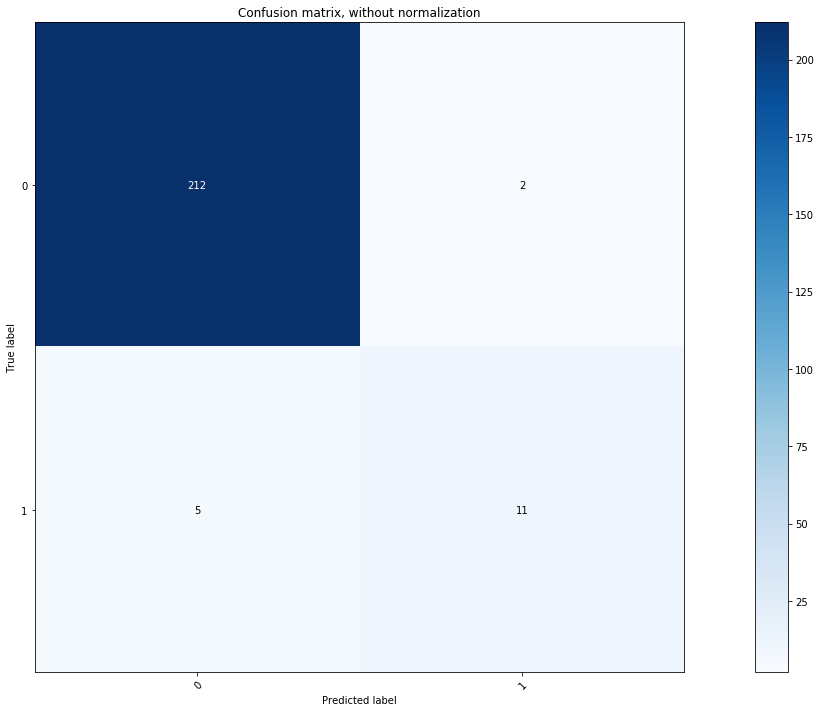

validation accuracy : 0.9695652173913043
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       214
           1       0.85      0.69      0.76        16

    accuracy                           0.97       230
   macro avg       0.91      0.84      0.87       230
weighted avg       0.97      0.97      0.97       230



In [224]:
#confusion metrix
cm = confusion_matrix(test_y, fpred_y)
s = ["0","1"]
plot_confusion_matrix(cm, classes=s, normalize=False,title=None,cmap=plt.cm.Blues)
print('validation accuracy :',facc)
print(classification_report(test_y, fpred_y,target_names=s))